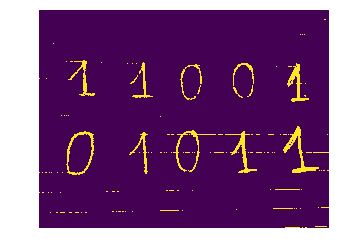

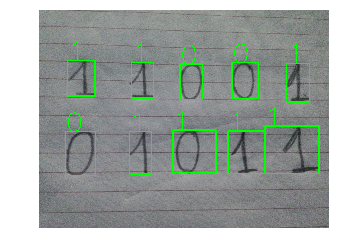

In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
im =cv2.imread("im.jpg")

im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray,(5,5),2)


ret, im_th = cv2.threshold(im_gray,94,200,cv2.THRESH_BINARY_INV)
ctrs,_ = cv2.findContours(im_th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects =[cv2.boundingRect(ctr) for ctr in ctrs]
plt.imshow(im_th)
plt.axis("off")
plt.show()
        

from sklearn.externals import joblib
model = joblib.load("digit_model.pkl")


for rect in rects:
    if (rect[2])>130 and (rect[3])>130:
        cv2.rectangle(im,(rect[0],rect[1]),(rect[2]+rect[0],rect[3]+rect[1]),(0,255,0),15)
        len = int(rect[3]*1.6)
        pt1 = int(rect[1]+rect[3]//2-len//2)
        pt2 = int(rect[0]+rect[2]//2-len//2)
        roi = im_th[pt1:pt1+len,pt2:pt2+len]
        roi = cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi,(3,3))
        roi_r =np.array([roi]).reshape(1,28*28)
        
        #print roi_r
        ret = model.predict(roi_r)
       # print ret
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(im,str(int(ret[0])),(rect[0],rect[1]), font, 10, (0,255,0),10,cv2.FONT_HERSHEY_SIMPLEX)
      
       # plt.imshow(roi)
       # plt.axis("off")
       # plt.show()
plt.imshow(im)
plt.axis("off")
plt.show()
        

In [87]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
import numpy as np 

mnist = fetch_mldata(dataname= 'mnist-original',target_name = 'mnist-original.mat',data_home='/home/kuon/mldata/')

X = mnist["data"]

y = mnist["target"]



/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [88]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [89]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]



def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [90]:

def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [91]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(100):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


('Epoch', 0, 'cost: ', -0.0)
('Epoch', 1, 'cost: ', -0.0)
('Epoch', 2, 'cost: ', -0.0)
('Epoch', 3, 'cost: ', -0.0)
('Epoch', 4, 'cost: ', -0.0)
('Epoch', 5, 'cost: ', -0.0)
('Epoch', 6, 'cost: ', -0.0)
('Epoch', 7, 'cost: ', -0.0)
('Epoch', 8, 'cost: ', -0.0)
('Epoch', 9, 'cost: ', -0.0)
('Epoch', 10, 'cost: ', -0.0)
('Epoch', 11, 'cost: ', -0.0)


KeyboardInterrupt: 

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 831    1   24   28    3   45   23   13   25   20]
 [   0 1056   22    9   10   13    7   30   11    8]
 [  21   13  751   44   18   34   66   17   45    5]
 [  25   13   53  690   15   89   12    8   70    9]
 [   2    1   14   10  679   42   59   31   42  129]
 [  44   12    8  109   19  499   36   22   65   21]
 [  22    9   75   20   38   57  708    6   35   12]
 [   8    2   19   14   36   18    8  809   15   80]
 [  26   26   43   55   32   76   30   19  620   38]
 [   1    2   23   31  132   19    9   73   46  687]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1013
           1       0.93      0.91      0.92      1166
           2       0.73      0.74      0.73      1014
           3       0.68      0.70      0.69       984
           4       0.69      0.67      0.68      1009
           5       0.56      0.60      0.58       835
           6       0.74      0.72      0.73       982
           7       0.79      0.80   

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


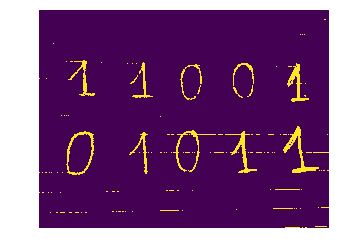

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


[[6.43034288e-05]
 [6.48967304e-03]
 [2.17887713e-03]
 [3.43497422e-02]
 [1.97621019e-03]
 [1.68510303e-01]
 [4.00252683e-02]
 [7.14231299e-01]
 [1.41791191e-03]
 [3.07564120e-02]]
[[3.34789715e-01]
 [5.02008706e-06]
 [3.43825806e-02]
 [1.58683218e-01]
 [9.94806848e-04]
 [7.20884135e-03]
 [4.38918261e-03]
 [5.38023727e-04]
 [8.46558995e-04]
 [4.58162052e-01]]
[[1.46893486e-04]
 [9.65956546e-05]
 [2.35207094e-04]
 [1.04714526e-03]
 [3.19528438e-03]
 [9.25909457e-01]
 [4.71720397e-02]
 [3.32867838e-06]
 [2.21727088e-02]
 [2.13394701e-05]]
[[5.56475546e-02]
 [9.31419673e-04]
 [1.41220609e-02]
 [8.48754430e-01]
 [6.91745064e-04]
 [4.66945545e-02]
 [7.16583151e-04]
 [3.15181547e-02]
 [9.22146019e-04]
 [1.35100638e-06]]
[[7.64004821e-06]
 [3.31998813e-03]
 [9.77761446e-04]
 [7.32014928e-02]
 [4.21511263e-03]
 [1.82695812e-02]
 [7.23737700e-03]
 [2.36024737e-03]
 [4.67569906e-02]
 [8.43653809e-01]]
[[9.67999222e-01]
 [7.20304572e-08]
 [4.62822567e-04]
 [1.42440416e-03]
 [2.20986582e-04]
 [2.8

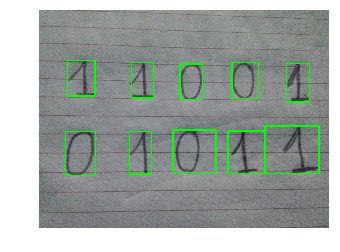

In [86]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
im =cv2.imread("im.jpg")

im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray,(5,5),2)


ret, im_th = cv2.threshold(im_gray,94,200,cv2.THRESH_BINARY_INV)
ctrs,_ = cv2.findContours(im_th.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects =[cv2.boundingRect(ctr) for ctr in ctrs]
plt.imshow(im_th)
plt.axis("off")
plt.show()
        

from sklearn.externals import joblib
model = joblib.load("digit_model.pkl")


for rect in rects:
    if (rect[2])>130 and (rect[3])>130:
        cv2.rectangle(im,(rect[0],rect[1]),(rect[2]+rect[0],rect[3]+rect[1]),(0,255,0),15)
        len = int(rect[3]*1.6)
        pt1 = int(rect[1]+rect[3]//2-len//2)
        pt2 = int(rect[0]+rect[2]//2-len//2)
        roi = im_th[pt1:pt1+len,pt2:pt2+len]
        roi = cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)
        roi = cv2.dilate(roi,(3,3))
        roi_r =np.array(roi).reshape(28*28,1)
        
        #print roi_r
        ret = model.predict(roi_r.T)
        
        
        Z1 = np.matmul(W1, roi_r) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2, A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)
        print A2
    # print ret
        #font = cv2.FONT_HERSHEY_SIMPLEX
        #cv2.putText(im,str(int(ret[0])),(rect[0],rect[1]), font, 10, (0,255,0),10,cv2.FONT_HERSHEY_SIMPLEX)
      
       # plt.imshow(roi)
       # plt.axis("off")
       # plt.show()
plt.imshow(im)
plt.axis("off")
plt.show()
        